In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from helpermodules import correlation_study
import pickle
from helpermodules.correlation_study import CorrelationAnalysis

In [2]:
# Take data
with open('pickle_files/cleaned_sp500_df.pkl', 'rb') as f:
    df = pickle.load(f)

In [5]:
# Extract tickers
tickers = df.columns.tolist()

# Compute percentage changes and drop NaNs
df_returns = df.pct_change().dropna(how='any')

# Instantiate the CorrelationAnalysis class
corr_analysis = CorrelationAnalysis(dataframe=df_returns, tickers=tickers)

# Calculate correlation coefficients and p-values
corr_analysis.get_correlated_stocks(use_pct_change=False)


'Pickle files for correlation values and p-values have been saved.'

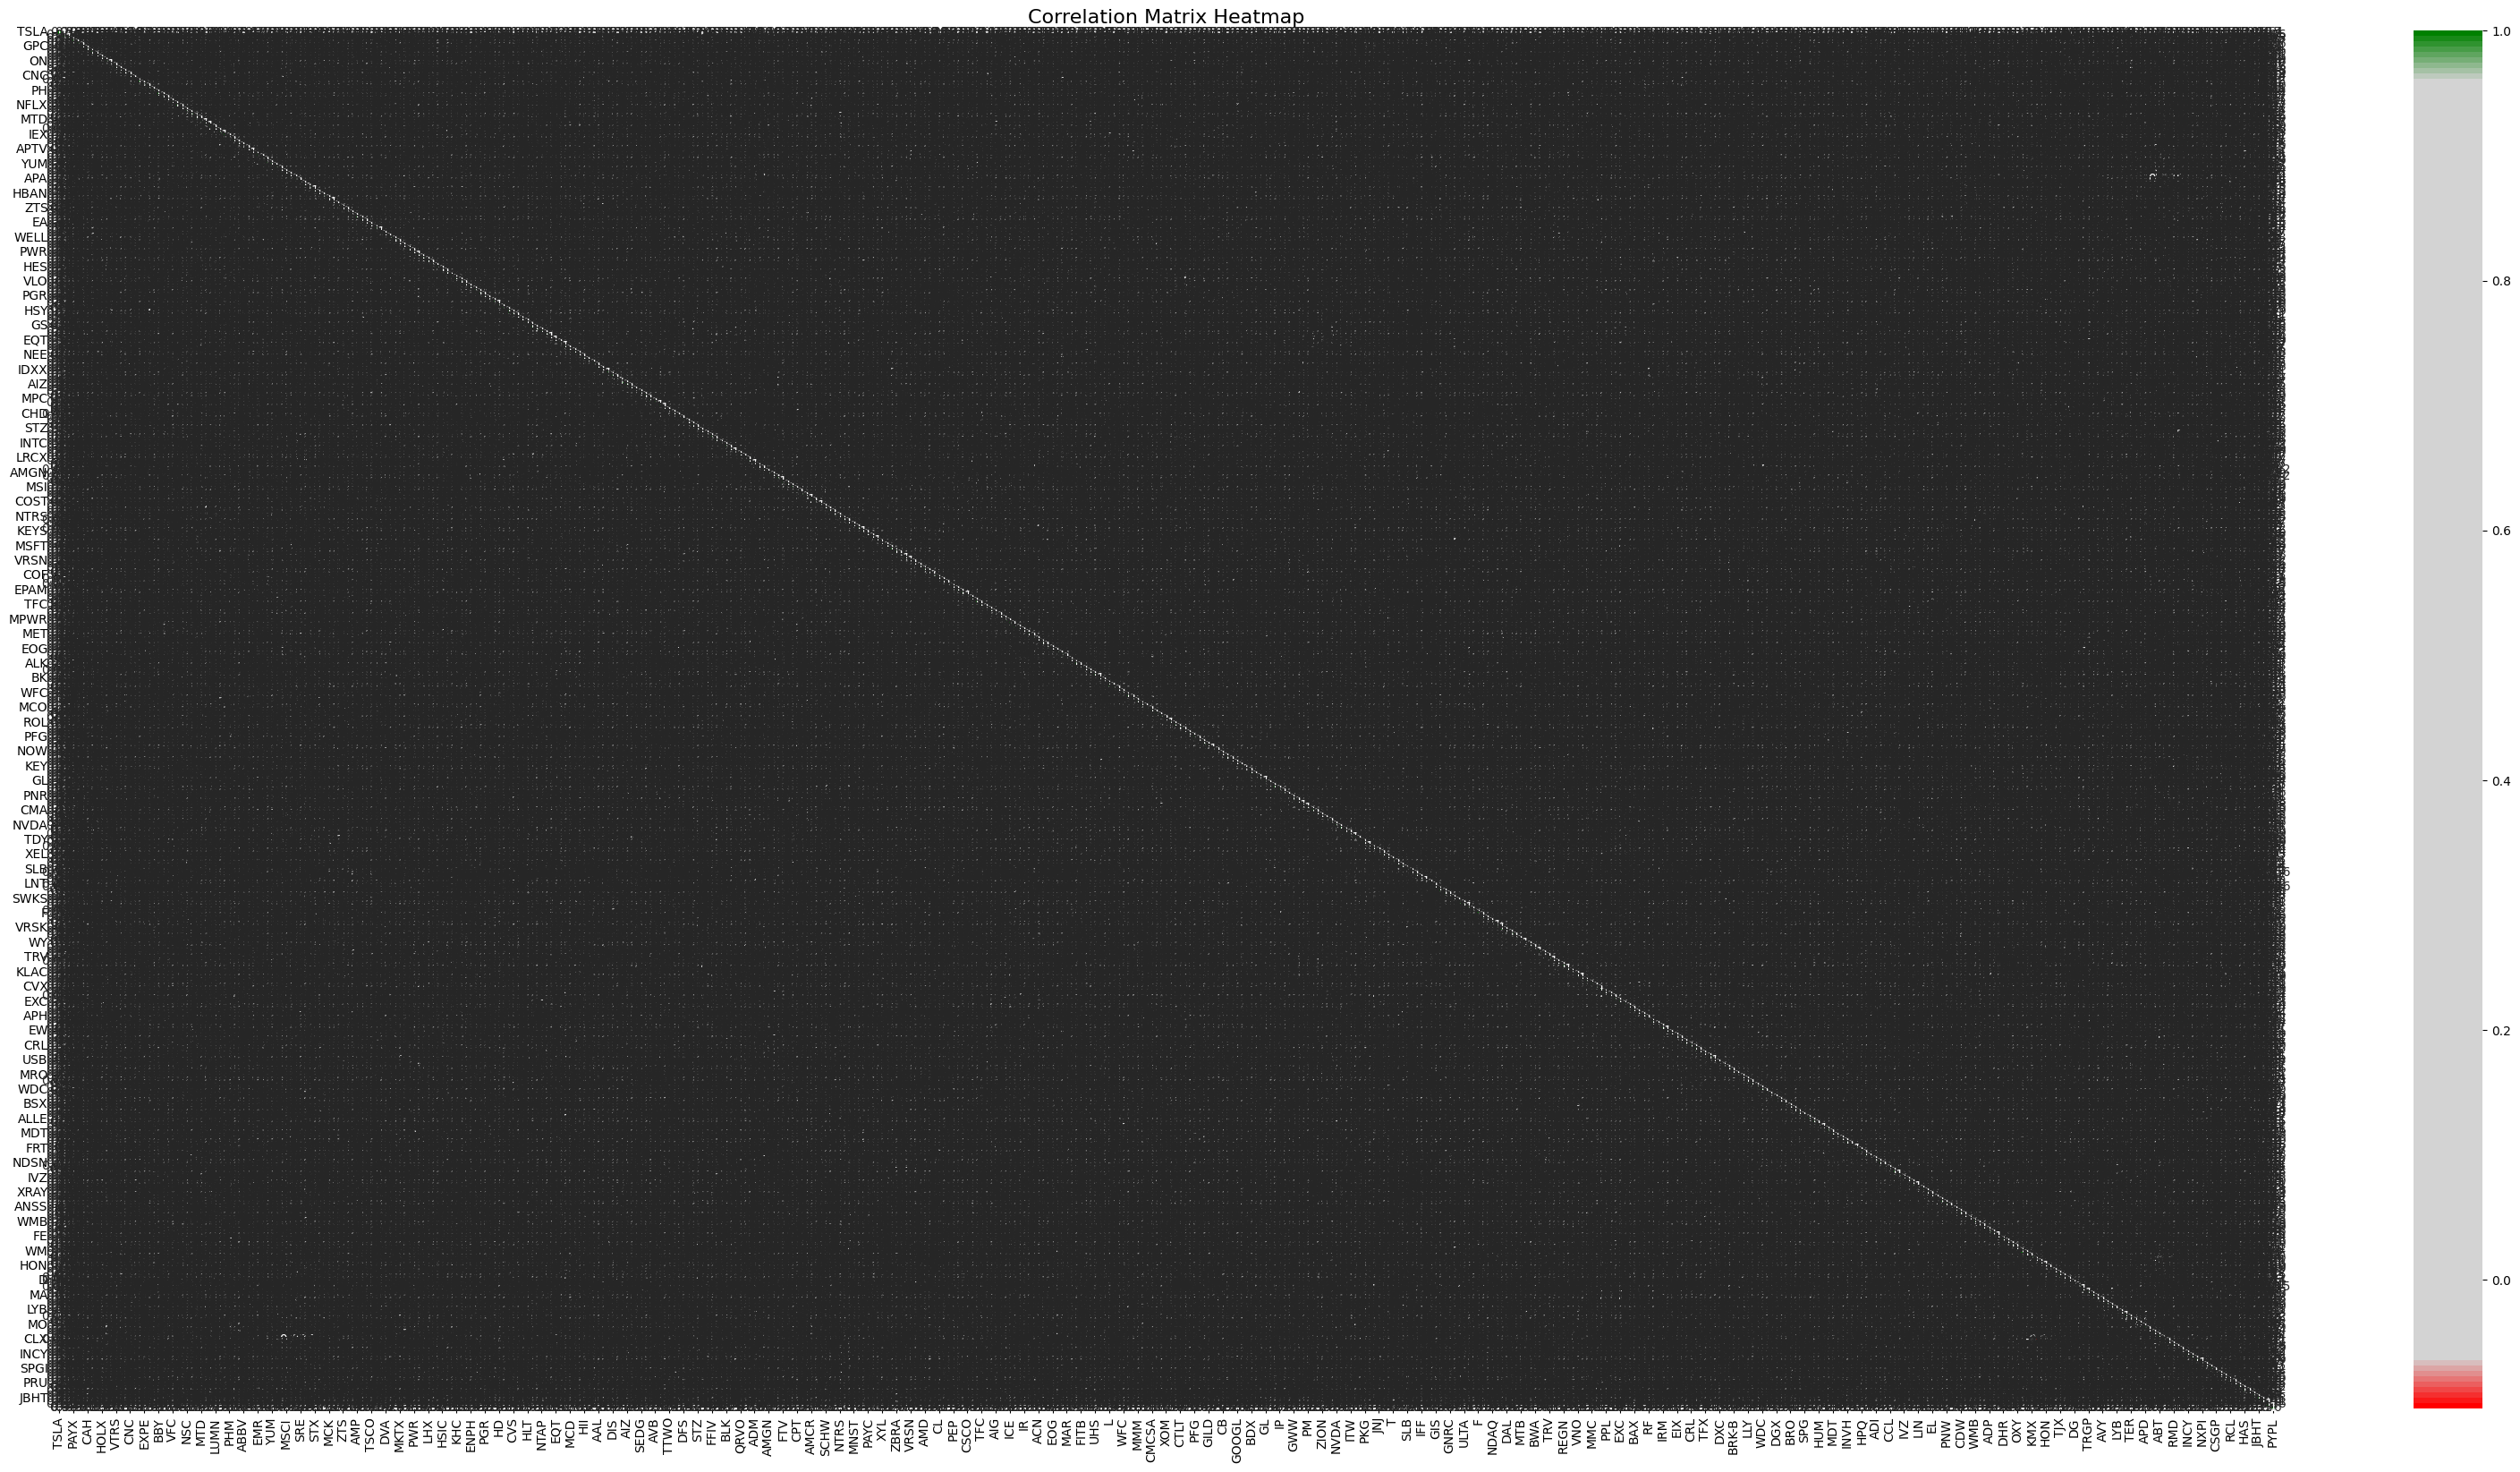

Most correlated pair: ['REG', 'FRT'] with correlation: 0.9261259395796431


In [6]:
# Identify the top 3 most correlated stock pairs
top_correlated_pairs = corr_analysis.top3_corrstocks()


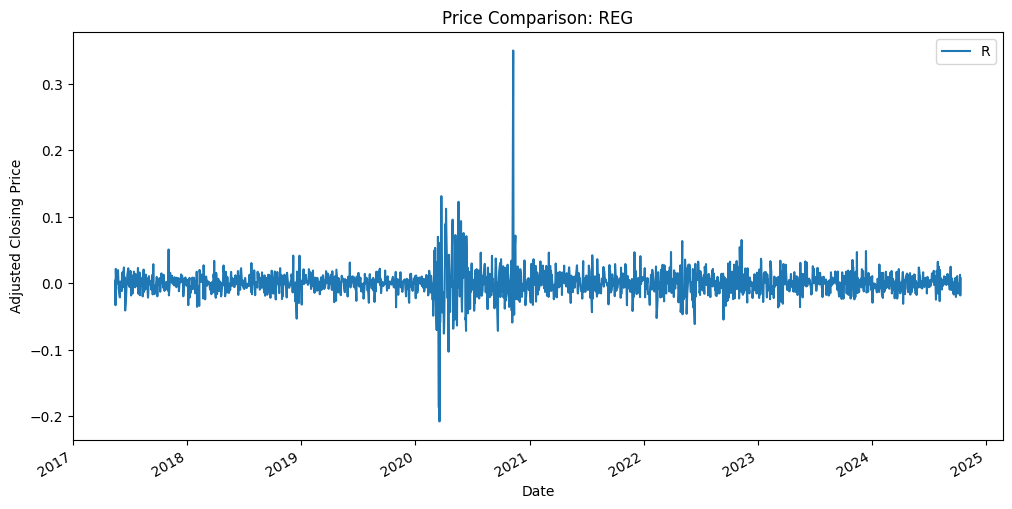

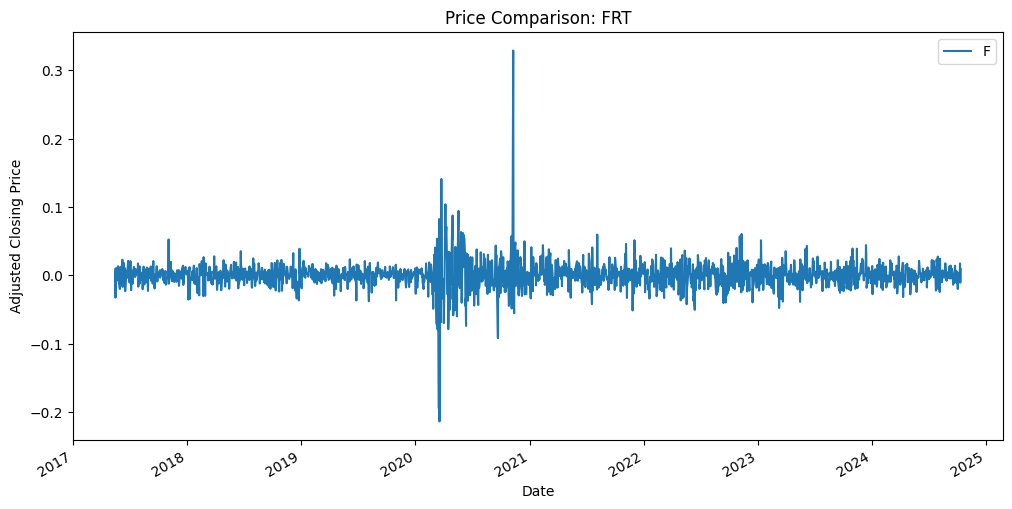

In [8]:
# Plotting the top correlated pairs
for rank, pair in enumerate(top_correlated_pairs, 1):
    df_returns[pair].plot(figsize=(12, 6), title=f"Price Comparison: {pair}")
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend(pair)
    plt.show()


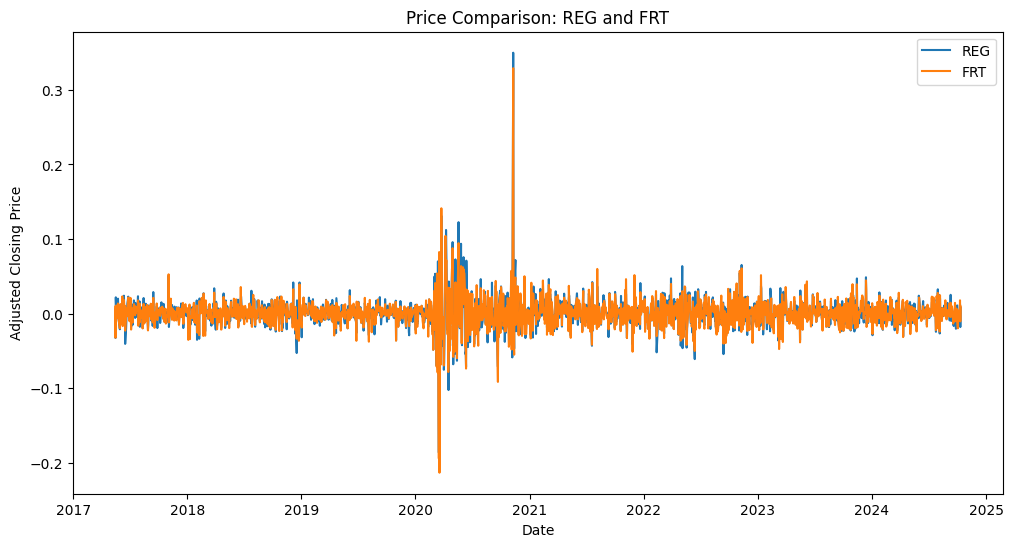

In [10]:
most_correlated_pair = ['REG', 'FRT']  

# Plot both stocks on the same plot
plt.figure(figsize=(12, 6))
plt.plot(df_returns.index, df_returns[most_correlated_pair[0]], label=most_correlated_pair[0])
plt.plot(df_returns.index, df_returns[most_correlated_pair[1]], label=most_correlated_pair[1])
plt.title(f"Price Comparison: {most_correlated_pair[0]} and {most_correlated_pair[1]}")
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()